# DATA ANALYSIS OF RELATIONSHIPS
#### SINEM ALTUN

In [169]:
# Libraries
import csv
import math
import random
import statistics
import pandas as pd
import numpy as np
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')  # To ignore python warnings

# Visualizing
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn import tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix,silhouette_samples, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB

# IMPORTING DATA

In order to ingest data directly from Kaggle I create a new API token which downloads a kaggle.json file that contains a username and a key. By using them, I can easily import speed dating experiment data into my directory.

In [424]:
#!pip install opendatasets
#od.download('https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment')

Here is the data, first things first I am dropping rows that contain null pid values. pid represents a participant's partner id number. If this section is null that means a participant did not interact with anyone and there is no need to keep null values in my case, as it won't effect anything.

This data is messy and unprepared, it contains sections I won't interact with, or sections that are completely null. I need to clean and organize it in order to fit it to my models.

Next section, I will categorize the data and inspect it thoroughly.

In [2]:
file =('speed-dating-experiment\Speed Dating Data.csv')
data = pd.read_csv(file)
data = data[data['pid'].notna()]
data = data.reset_index(drop=True)
data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8364,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8365,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8366,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


# CATEGORIZING THE DATA

**HEADERS**

Seeing all the row names helps me understand the data I am working with. There are a lot of what seems like repeating titles, which are a little different (but not that much) from each other, as we will see.

In [3]:
headers=[]
for col in data.columns:
    headers.append(col)            
print(headers)

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

**GENERAL INFO**

General info contains attributes that give information about the subject(participant) and the wave they attended. There are 552 participants and 21 waves in total. iid is a unique subject number, but is only unique in that particicular wave. Only one person has iid 1; but several people have id 1 in different waves.

There are also attributes that explain the interaction between 2 participants, are they the same race? did they match?...

In [4]:
start = headers.index('iid')
end = headers.index('met_o')
general_info = data.iloc[:,start:end+1]
general_info

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
0,1,1.0,0,1,1,1,10,7,NaN,4,...,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,552,22.0,1,44,2,21,22,14,10.0,5,...,1,10.0,5.0,3.0,2.0,6.0,5.0,6.0,1.0,NaN
8364,552,22.0,1,44,2,21,22,13,10.0,4,...,0,6.0,3.0,7.0,3.0,7.0,2.0,2.0,2.0,2.0
8365,552,22.0,1,44,2,21,22,19,10.0,10,...,0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
8366,552,22.0,1,44,2,21,22,3,10.0,16,...,1,5.0,7.0,5.0,5.0,3.0,6.0,6.0,4.0,2.0


**PARTICIPANT INFO**

The data originally has rows structured as pairs. For example a row has iid, and pid. The participant id and their partner's id, with later columns we find info about their date and the participant and sometimes about the partner. It is better, if I have all the information about specifically one participant in a single row. Now, instead of having a data with 8k rows (meaning 8k interactions in total, each ending with either match(1) or not match(0)) I have 551 rows for 552 people :)

This is a simple but necessary change when creating models.

In [20]:
participant_info = data.drop_duplicates(subset=['iid']).reset_index(drop=True)
participant_info 

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,2.0,0,3,1,1,10,3,NaN,10,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
2,3,3.0,0,5,1,1,10,9,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.0,0,7,1,1,10,6,NaN,3,...,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
4,5,5.0,0,9,1,1,10,4,NaN,1,...,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,548,18.0,1,36,2,21,22,21,9.0,13,...,8.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,9.0,7.0
547,549,19.0,1,38,2,21,22,21,7.0,15,...,7.0,9.0,8.0,7.0,8.0,5.0,8.0,8.0,6.0,8.0
548,550,20.0,1,40,2,21,22,21,20.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,551,21.0,1,42,2,21,22,21,21.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**SIGN UP**

Sign up is the survey participants fill out before attending the experiment. We learn more about who the participant is and what they look for in a partner 6 main attribute-wise (attractive, sincere, intelligent, fun, ambitious, common hobbies/interests).

I also observe by first sight that there are many missing values in certain categories such as mn_sat and tuition which I will not use.

In [6]:
start = headers.index('age')
end = headers.index('amb5_1')
signup = data.iloc[:,start:end+1]
signup

,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,...,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
2,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
3,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
4,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,25.0,Climate Dynamics,18.0,"Ecole Normale Sup�rieure, Paris",NaN,NaN,2.0,1.0,1.0,France,...,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0
8364,25.0,Climate Dynamics,18.0,"Ecole Normale Sup�rieure, Paris",NaN,NaN,2.0,1.0,1.0,France,...,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0
8365,25.0,Climate Dynamics,18.0,"Ecole Normale Sup�rieure, Paris",NaN,NaN,2.0,1.0,1.0,France,...,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0
8366,25.0,Climate Dynamics,18.0,"Ecole Normale Sup�rieure, Paris",NaN,NaN,2.0,1.0,1.0,France,...,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0


**SCORECARD BEGINNING**

Scorecard is filled out by participants after each date during the event. What do they think about their partner, again 6 main attribute-wise, do they like this person? have they met before? and most importanly what is their decision, yes or no? If both parties say yes then we have a match!

In [7]:
# [Filled out by subjects after each "date" during the event
start = headers.index('dec')
end = headers.index('match_es')
scorecard_beginning = data.iloc[:,start:end+1]
scorecard_beginning

,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0
1,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0
2,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0
3,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0
4,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
8363,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0,3.0
8364,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0,3.0
8365,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0,3.0
8366,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,0.0,3.0


**SCORECARD HALFWAY**

This scorecard is filled out half way through meeting all potential dates. I observe that this section of the data is useless as it contains not all, but mostly null values. It wouldn't be accurate to full empty values as the median.

1_s is people rating the importance of the 6 main attributes in a potential date on a scale of 1-10: (1=not at all important, 10=extremely important).

3_s is people rating their opinion of their own attributes, on a scale of 1-10 (1=awful, 10=great).

In [8]:
start = headers.index('attr1_s')
end = headers.index('amb3_s')
scorecard_halfway = data.iloc[:,start:end+1]
scorecard_halfway

,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def how_many_null(data, header):
    return data[header].isnull().sum()

print(how_many_null(scorecard_halfway, 'attr1_s'),"null attr1_s,",
      how_many_null(scorecard_halfway, 'sinc1_s'),"null sinc1_s,"
    ,how_many_null(scorecard_halfway, 'intel1_s'),"null intel1_s,"
    ,how_many_null(scorecard_halfway, 'fun1_s'),"null fun1_s,"
    ,how_many_null(scorecard_halfway, 'amb1_s'),"null amb1_s,"
    ,how_many_null(scorecard_halfway, 'shar1_s'),"null shar1_s")
print("\n")
print(how_many_null(scorecard_halfway, 'attr3_s'),"null attr3_s,",
    how_many_null(scorecard_halfway, 'sinc3_s'),"null sinc3_s,",
    how_many_null(scorecard_halfway, 'intel3_s'),"null intel3_s,",
    how_many_null(scorecard_halfway, 'fun3_s'),"null fun3_s,",
    how_many_null(scorecard_halfway, 'amb3_s'),"null amb3_s")

4272 null attr1_s, 4272 null sinc1_s, 4272 null intel1_s, 4272 null fun1_s, 4272 null amb1_s, 4272 null shar1_s


4368 null attr3_s, 4368 null sinc3_s, 4368 null intel3_s, 4368 null fun3_s, 4368 null amb3_s


**FOLLOW UP**

Follow up survey is filled out the day after participating in the event. What are their opinions on the structure of the event, was the date length or number of dates enough, too much? 

7_2 makes people reflect back on their yes/no decisions. they are asked to distribute 100 points among 6 main attributes and decide how much effect they had on their final decision.

1_2 is again people rating the importance of these features in a partner. But the difference is this time the experiment is over. So maybe, people's opinion have changed after meeting potential dates.

4_2 is what participants think most of your men/women look for in the opposite sex.

2_2 is what participants think the opposite sex looks for in a date.

3_2 is how do participants think they measure up.

5_2 is how do participants think others perceive them.

The rating process of 6 attributes although slightly different, are mostly the same. Therefore most of them contain null values as I would consider them as repeating questions. 

In [10]:
start = headers.index('satis_2')
end = headers.index('amb5_2')
followup = data.iloc[:,start:end+1]
followup

,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,...,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
1,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
2,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
3,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
4,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,...,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.00,...,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0
8364,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.00,...,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0
8365,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.00,...,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0
8366,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.00,...,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0


**FOLLOW UP 2**

Follow up 2 is the survey participants fill out 3-4 weeks after they had been sent their matches. Did they contact their matches and meet?..

6 main attribute questions are the same as follow up 1...

In [11]:
start = headers.index('you_call')
end = headers.index('amb5_3')
followup2 = data.iloc[:,start:end+1]
followup2

,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8364,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8365,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8366,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


**PARTICIPANTS**

Here is all the id numbers of participants, 55 in total, in array form.

In [12]:
participants = participant_info['iid'].to_numpy()

Categorizing the data was useful, because the data I have, has so many attributes it easy to miss some important features and decide which of them might be useful when constructing certain models in this project. 

# DATA CLEANING & PREPARATION
How that I know my data and it's potential I can get to cleaning and preparing it for the modeling process.

**TEST 1**

The career coding goes like this:

Career coding is given below.

    1= Lawyer 
    2= Academic/Research 
    3= Psychologist 
    4= Doctor/Medicine 
    5=Engineer 
    6= Creative Arts/Entertainment 
    7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
    8= Real Estate 
    9= International/Humanitarian Affairs 
    10= Undecided 
    11=Social Work
    12=Speech Pathology
    13=Politics
    14=Pro sports/Athletics
    15=Other
    16=Journalism
    17=Architecture
    
I classify those who have their career section null, as unemployed and make their coded career 18. Which represent being unemployed. I observed that for all people if career is null, then so is career code. There are no errors made here where I classify someone with a job as unemployed.

In [13]:
print(how_many_null(data,'career'),"null values in the career category!")
index_list = data[data['career'].isnull()].index.tolist()
for i in index_list:
    data['career_c'][i] = 18;
    data['career'][i] = 'Unemployed'
#18 means unemployed

89 null values in the career category!


In [14]:
print("Now,",how_many_null(data,'career'),"null values in the career category!")

Now, 0 null values in the career category!


After observing the participants who have their career code section as null, I realise they mostly have law, or other jobs which are not coded.

1 represents law and 15 represents other types of jobs. So I apply them to their career coding.

In [15]:
print(how_many_null(data,'career_c'),"null values in the career code category!")
index_list = data[data['career_c'].isnull()].index.tolist()

for i in index_list:
    career = data['career'][i]
    if (career=='lawyer') | (career=='law'):
        data['career_c'][i] = 1;
    else:
        data['career_c'][i] = 15;

49 null values in the career code category!


In [16]:
print("Now,",how_many_null(data,'career_c'),"null values in the career category!")

Now, 0 null values in the career category!


Later on, I will be working with career coding a lot so it is better to have it cleaned and preapred.

**TEST 2**

The *fill_missing_values* function was taken and modified slightly from the project below.

> https://www.kaggle.com/code/himanshubajpai/kmeans-dating

In [17]:
def fill_missing_values(df,column_name, value):
    for i in range(len(df[column_name].values)):
        if math.isnan(df[column_name][i]):
            df[column_name][i] = value

1_1 is 100 points distrubted as the importance of what people are looking for a in partner. Null values are filled out as the median of those values. 

It is appropriate to do this because there are not that many null values in this section.

In [61]:
medianattr = statistics.mode(participant_info['attr1_1'].values)
fill_missing_values(participant_info,'attr1_1', medianattr) 

mediansinc = statistics.mode(participant_info['sinc1_1'].values)
fill_missing_values(participant_info,'sinc1_1', mediansinc)

medianintel = statistics.mode(participant_info['intel1_1'].values)
fill_missing_values(participant_info,'intel1_1', medianintel)

medianfun = statistics.mode(participant_info['fun1_1'].values)
fill_missing_values(participant_info,'fun1_1', medianfun)

medianamb = statistics.mode(participant_info['amb1_1'].values)
fill_missing_values(participant_info,'amb1_1', medianamb)

medianshar = statistics.mode(participant_info['shar1_1'].values)
fill_missing_values(participant_info,'shar1_1', medianshar)

**TEST 3**

Same process is done for:

- goal: What is your primary goal in participating in this event? 

- date: In general, how frequently do you go on dates? 

- go out: How often do you go out (not necessarily on dates)?

- expnum: Out of the 20 people you will meet, how many do you expect will be interested in dating you? 


In [62]:
mediangoal = statistics.mode(participant_info['goal'].values)
fill_missing_values(participant_info,'goal', mediangoal)

mediandate = statistics.mode(participant_info['date'].values)
fill_missing_values(participant_info,'date', mediandate)

mediango = statistics.mode(participant_info['go_out'].values)
fill_missing_values(participant_info,'go_out', mediango)

medianexp = statistics.mode(participant_info['expnum'].values)
fill_missing_values(participant_info,'expnum', medianexp)

I am aware that some of the changes I made are only on specific data frames and not in the general data. This will not be a problem later on because: 

* For the changes I made on *data* I run participant_info code above, again. Which is a data frame derived from *data*.

* When it is time to test attr1_1, shar1_1 etc... I will work on *participant_info* which is where the median was applied.

# MATCH GRAPH

Let's observe some of the succesful matches to get an idea of how to construct a model.

Below is the data frame of people who matched.

In [21]:
df = general_info.loc[general_info['match'] == 1]
#pid = partner’s iid number
#iid = unique subject number, group(wave id gender)
match_situation = df[['iid','pid','match']]
match_situation = match_situation.reset_index(drop=True)
match_situation

,iid,pid,match
0,1,13.0,1
1,1,14.0,1
2,1,15.0,1
3,1,19.0,1
4,2,14.0,1
...,...,...,...
1375,552,510.0,1
1376,552,513.0,1
1377,552,515.0,1
1378,552,516.0,1


Representing it on a network graph, we can see the connections and situations where a person only matched with one person or multiple people.

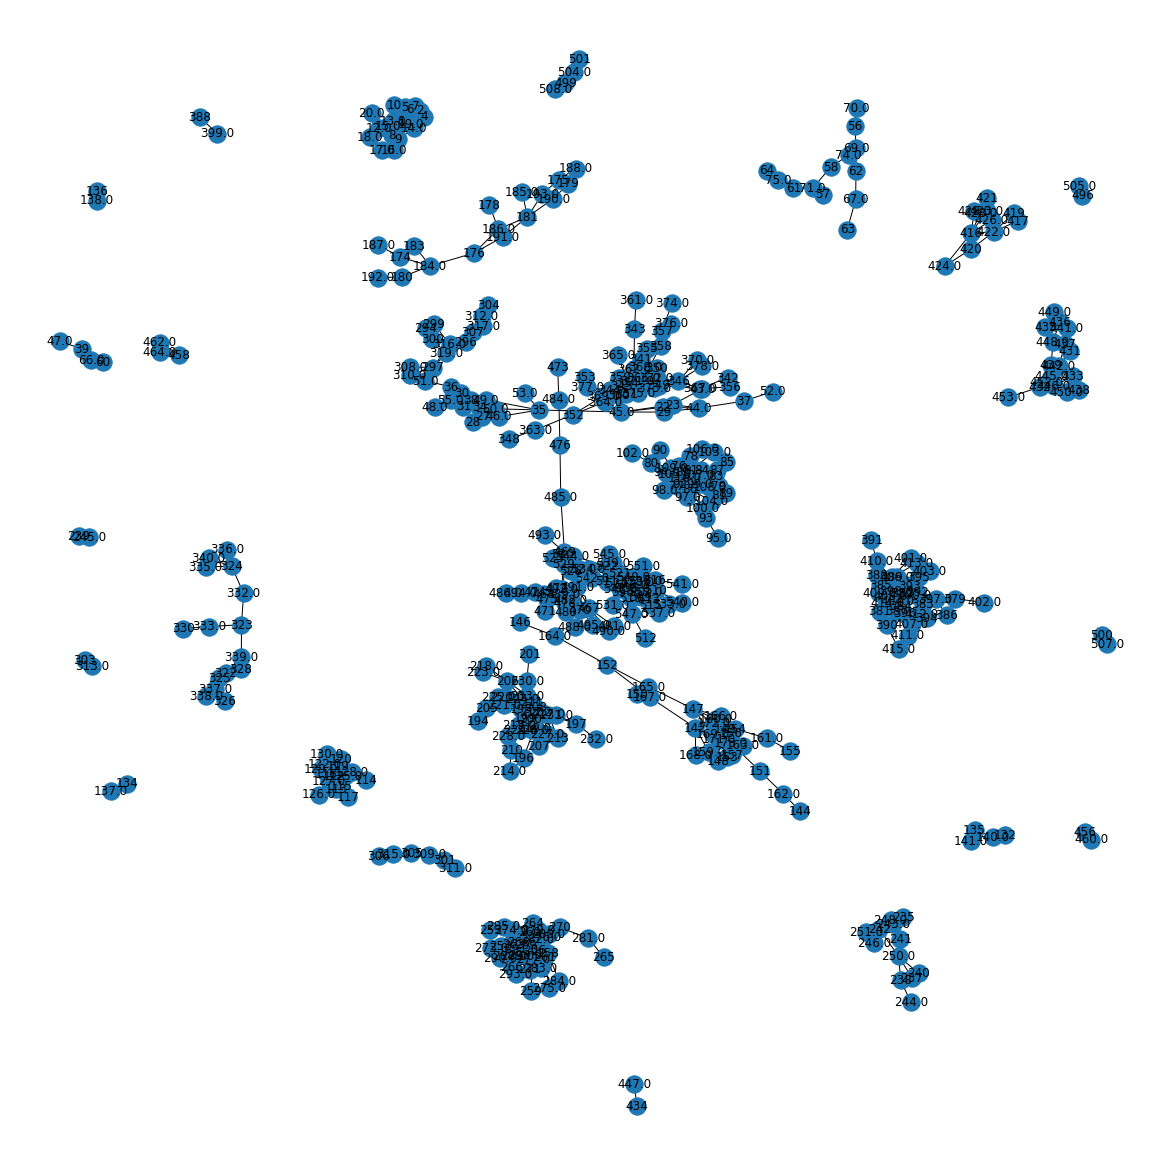

In [22]:
G = nx.from_pandas_edgelist(match_situation, 'iid', 'pid')
plt.figure(3,figsize=(16,16)) 
nx.draw(G,with_labels=True)
plt.show()

It is hard to see in this graph who got the MOST matches in this event. So I find that participant by using groupy's count.

In [23]:
counter = match_situation.groupby('iid').count()
person = counter.idxmax()[0]
no = max(counter['match'])
print("Person",person , "got the most matches. Total of",no,"!")

Person 524 got the most matches. Total of 14 !


In the later section, knowing the person who got the most matches will be an advantage as I am slowly deciding on the parameters and making simple assumptions for my model.

# LOGISTIC REGRESSION MODELING
### VISUALIZATION

Firstly I want to examine the career spread of subjects. Participant_info contains personal info about each subject.

In [24]:
test1 = participant_info[['iid','gender','career_c','career','field']]
test1

,iid,gender,career_c,career,field
0,1,0,1.0,lawyer,Law
1,2,0,1.0,law,law
2,3,0,15.0,Economist,Economics
3,4,0,1.0,lawyer/policy work,Law
4,5,0,1.0,lawyer,Law
...,...,...,...,...,...
546,548,1,7.0,Management,Business
547,549,1,7.0,General management/consulting,General management/finance
548,550,1,7.0,Finance,MBA
549,551,1,7.0,Banking,Business


Career coding is given below.

    1= Lawyer 
    2= Academic/Research 
    3= Psychologist 
    4= Doctor/Medicine 
    5=Engineer 
    6= Creative Arts/Entertainment 
    7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
    8= Real Estate 
    9= International/Humanitarian Affairs 
    10= Undecided 
    11=Social Work
    12=Speech Pathology
    13=Politics
    14=Pro sports/Athletics
    15=Other
    16=Journalism
    17=Architecture
    18=Unemployed

Here is the count plot of subjects for each career, grouped by gender. Academic/Research (code: 2) has the highest amount of participants on this experiment, 152 people in total.

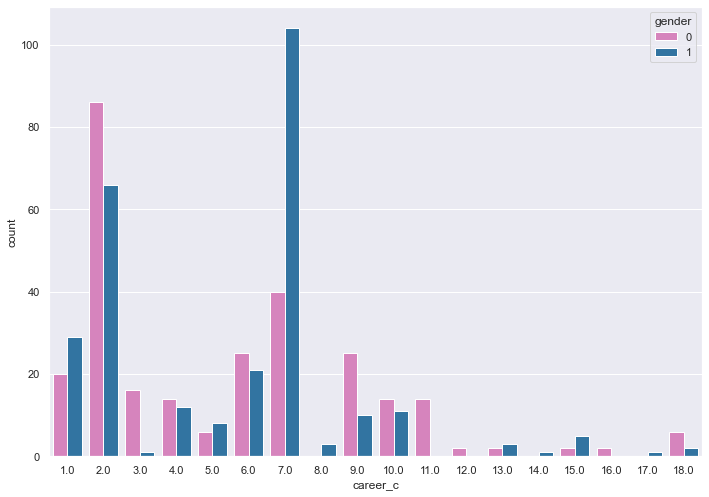

In [28]:
palette = {0:"tab:pink",1:"tab:blue"}
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='career_c',data=test1,hue='gender', palette=palette);

In [29]:
print(participant_info.loc[participant_info['career_c']==2].shape[0],"people working as an Academic/Research ")

152 people working as an Academic/Research 


Now that I know the general spread of careers, I specifically want to examine subject 524's matches and their careers. Remembering that subject 524 has the most matches. 

In [30]:
test1_1 = data.loc[(data['iid'] == 524) & (data['match'] == 1)]
partners = test1_1['pid']

In [31]:
# Career
print("Person 524's field is",test1_1['field'][test1_1.index[0]],"and their intended career is",test1_1['career'][test1_1.index[0]],"with the code",test1_1['career_c'][test1_1.index[0]])

Person 524's field is medicine and their intended career is physician/healthcare with the code 4.0


In [36]:
par_car = pd.DataFrame(columns = test1.columns)
for i in partners:
    pm = participant_info.loc[participant_info['iid']==i]
    pm = pm[['iid','gender','career_c','career','field']]
    par_car = par_car.append(pm,ignore_index=True)

In [37]:
par_car

,iid,gender,career_c,career,field,race
0,531,1,2.0,TEACHING,ELECTRICAL ENGINEERING,NaN
1,532,1,5.0,ASIC Engineer,Electrical Engineering,NaN
2,534,1,5.0,"software engr, network engr",electrical engineering,NaN
3,535,1,2.0,Science,Biochemistry,NaN
4,536,1,7.0,Finance,Math,NaN
5,538,1,7.0,self-made millionare,Biomedical engineering,NaN
6,539,1,1.0,Lawyer,Law,NaN
7,542,1,7.0,To go into Finance,Masters of Industrial Engineering,NaN
8,546,1,7.0,Consulting,Business,NaN
9,547,1,7.0,Private Equity - Leveraged Buy-Outs,MBA - Private Equity / Real Estate,NaN


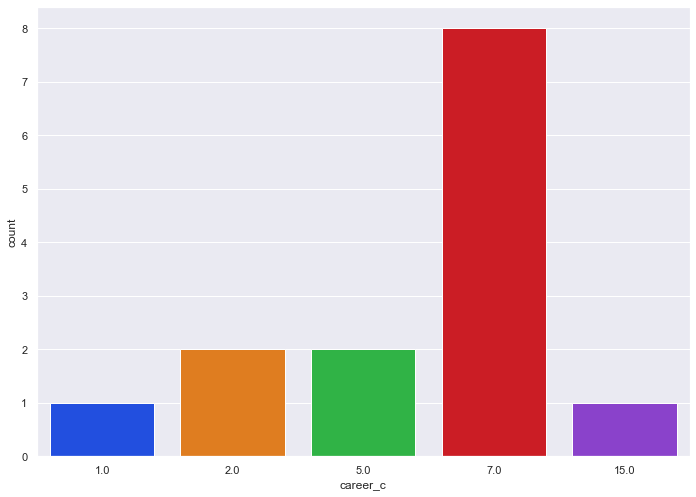

In [38]:
sns.countplot(x='career_c',data=par_car,palette='bright');

Clearly, none of 524's partners are in the same field as them, so by that conclusion let's make an assumption that people who are NOT in the same working field are more likely to match!

After inspecting the career aspect, it is time to observe participants' race spread.

In [39]:
test1['race']=participant_info[['race']]

    Black/African American=1
    European/Caucasian-American=2
    Latino/Hispanic American=3
    Asian/Pacific Islander/Asian-American=4
    Native American=5
    Other=6

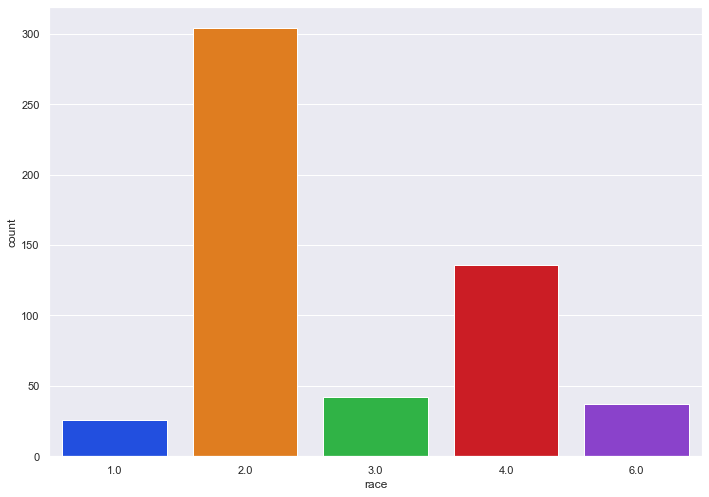

In [40]:
sns.countplot(x='race',data=test1,palette='bright');

In [41]:
print(participant_info.loc[participant_info['race']==2].shape[0],"people are European/Caucasian-American")

304 people are European/Caucasian-American


Once again, going from general to personal let's examine subject 524

In [42]:
print("Person 524's race is",test1_1['race_o'][test1_1.index[0]],
      "and on a scale of 1-10, it is", test1_1['imprace'][test1_1.index[0]],"important that the person they date has the same racial/ethnic background as them.")

Person 524's race is 4.0 and on a scale of 1-10, it is 9.0 important that the person they date has the same racial/ethnic background as them.


In [43]:
par_race=[]
for i in partners:
    for j in range(len(test1)):
        if test1['iid'][j]==i:
            person = test1.loc[test1['iid']==i]
            person = person['race'][j]
            par_race.append(person)
par_car['race']=par_race

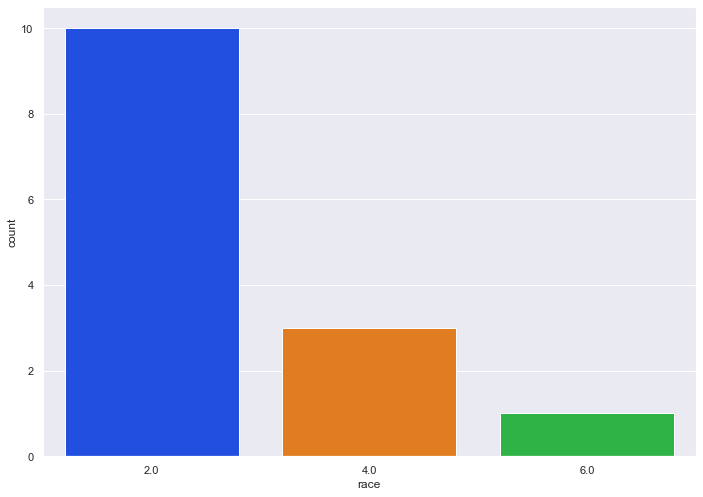

In [44]:
sns.countplot(x='race',data=par_car,palette='bright');

By looking at the graph, even though 524 is race 4, and prefers same race partners as them on a scale of 9, their partners are mostly race 2! 

Again, let's make an assumption and say that people prefer different race partners.

### CONSTRUCTING A MODEL

Below, I am going through the pairings and basically making binary labeling. If two people have the same career code then, same_career value is 1, if otherwise, 0.

In [45]:
test1_i = test1.set_index('iid')
fl = []
a = data[['iid','pid','match','field']]
for i in range(len(a)):
    p1 = a['iid'][i]
    p2 = a['pid'][i]
    p1_field = test1_i['career_c'][p1]
    p2_field = test1_i['career_c'][p2]
    if p1_field==p2_field:
        fl.append(1)
    else:
        fl.append(0)

same_race category is already provided in the previous data so no need to do extra work.

Here is the final data frame *a*, that will work on the model.

In [46]:
a['same_race'] = data['samerace']
a['same_career'] = fl
a

,iid,pid,match,field,same_race,same_career
0,1,11.0,0,Law,0,0
1,1,12.0,0,Law,0,1
2,1,13.0,1,Law,1,1
3,1,14.0,1,Law,0,1
4,1,15.0,1,Law,0,1
...,...,...,...,...,...,...
8363,552,526.0,0,Climate Dynamics,0,0
8364,552,527.0,0,Climate Dynamics,0,0
8365,552,528.0,0,Climate Dynamics,0,0
8366,552,529.0,0,Climate Dynamics,0,0


Now starts the process of, constructing a logistic regression model and step by step trying to make sense of it and making it better.

On my first try, I split my data as train and test and then fit the data. The usual process. But I also try to learn more about different solver types. The referenced section below, was helpful. But for my data trying different types of solvers did not make a huge difference in the outcome.

> https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

I did not create a loop yet, so I try to get an idea of the score of the model by running the code again and again. It is close to %84.9. Which is a pretty good score for a model! 

However...

When I examine the confusion matrix there seems to be a problem around label 1, the case of matches.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(a[['same_career','same_race']],a['match'])

model = LogisticRegression(max_iter=1500, solver='lbfgs')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
y_predict = model.predict(X_test)
confusion_matrix(y_test,y_predict)

0.8374760994263862


array([[1752,    0],
       [ 340,    0]], dtype=int64)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(a[['same_career','same_race']],a['match'])

model = LogisticRegression(max_iter=1500, solver='newton-cg')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
y_predict = model.predict(X_test)
confusion_matrix(y_test,y_predict)

0.8250478011472275


array([[1726,    0],
       [ 366,    0]], dtype=int64)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(a[['same_career','same_race']],a['match'])

model = LogisticRegression(max_iter=1500, solver='sag')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
y_predict = model.predict(X_test)
confusion_matrix(y_test,y_predict)

0.8264818355640535


array([[1729,    0],
       [ 363,    0]], dtype=int64)

Observing the confusion matrix, the model predicts label 0 (no match) %100 correct, and label 1 (match) %100 incorrect. 

* A reason why that might be, is visualized below. My data contains 8k pairings in total and a big portion of them ends with no match result. Therefore, the model might not have enough label 1 training.

* Another reason might be lack of parameters, here I am only observing for race and career, let's think of the age difference and how it effects the response variable.

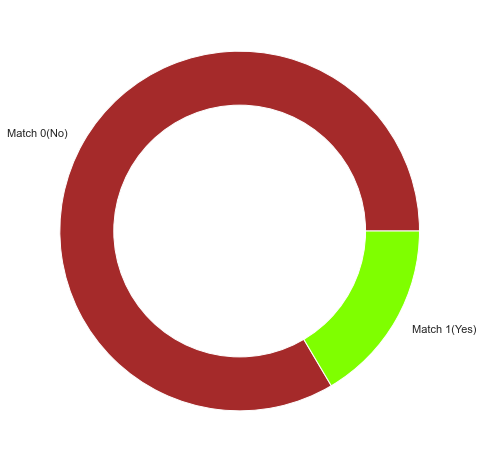

In [50]:
y = np.array([len(data.loc[data['match'] == 0]), len(data.loc[data['match'] == 1])])
colors = ['#A52A2A','#7FFF00']
plt.pie(y,labels=["Match 0(No)","Match 1(Yes)"],colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show() 

Adding age difference parameter, again turning it into a categorical data instead of numerical. 

If 2 people are the same age -> 0

1-3 difference -> 1

3+ age difference -> 2

In [51]:
agedif = []
for i in range(len(data)):
    age_difference = data['age'][i]-data['age_o'][i]
    if age_difference==0: #0
        agedif.append(0)
    elif age_difference<=3: #1-3
        agedif.append(1)
    else:
        agedif.append(2)

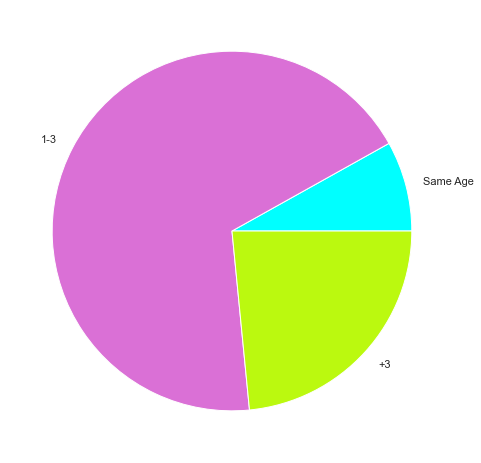

In [52]:
a['age difference'] = agedif
y = np.array([len(a.loc[a['age difference']==0]), len(a.loc[a['age difference']==1]),len(a.loc[a['age difference']==2])])
colors=['#00FFFF','#DA70D6','#BBF90F']
plt.pie(y,labels=["Same Age","1-3","+3"],colors=colors)
plt.show() 

Not much has changed... I still obtain a pretty good score but confusion matrix makes the model unreliable.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(a[['same_career','same_race','age difference']],a['match'])

model = LogisticRegression(max_iter=1500, solver='lbfgs')
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
y_predict = model.predict(X_test)
confusion_matrix(y_test,y_predict)

0.8260038240917782


array([[1728,    0],
       [ 364,    0]], dtype=int64)

In [54]:
cross_val_score(model, X_test, y_test, cv=5)

array([0.82577566, 0.82577566, 0.8277512 , 0.82535885, 0.82535885])

I mentioned above, how the lack of matching data might effect the model prediction badly, another approach I take to make the model work better is kfold cross validation. Doing kfold when splitting the data helps me use all parts of the data instead of maybe losing some valuable aspects (such a match=1) to the test. 

In [55]:
kf = KFold(n_splits=5)
X = a[['same_career','same_race','age difference']].to_numpy()
y = a['match'].to_numpy()
for train, test in kf.split(X,y):
    model = LogisticRegression(max_iter=1500)
    model.fit(X[train],y[train])
    print(model.score(X[test],y[test]))
    y_predict = model.predict(X[test])
    print(confusion_matrix(y[test],y_predict),"\n")

0.8273596176821983
[[1385    0]
 [ 289    0]] 

0.8249701314217444
[[1381    0]
 [ 293    0]] 

0.8554360812425329
[[1432    0]
 [ 242    0]] 

0.8182904961147639
[[1369    0]
 [ 304    0]] 

0.8493723849372385
[[1421    0]
 [ 252    0]] 



### CONCLUSION

Reaching the end of a logistic regression model, here are my theories and explanations on why this model worked the way it did:

As visible, with different approaches model score stayed pretty much the same around %84 and at most %86. Even though this is a good score, confusion matrixes showed me that this model is not capable of predicting match=1, which is the scenario of two people matching. Why?

- My parameters may have been not enough... There are so many attributes in the original data but I specifically worked with race, career and age categories. The challenging part for me was to prepare the data where I could feed it into the model. I decided to use categorical values and that is why I did not use as many parameters as there were. 

- The biggest possibility is what I mentioned previously, the size of this data seemed like enough in the beginning but as I was working on it I realized although there is potential to draw some interesting conclusions, it might not be enough to strongly predict if 2 people would match and date.

- Last part of my brain storming process is that machines can't learn love patterns because there is no stable pattern where we can claim opposites attract or similar people are more likely to match. Maybe for long term relationships it is easier to draw conclusions as there is a long time period where both parties get used to each other, but as of first love and first attraction there may not be a stable formula! Very interesting to observe.

# K-MEANS MODELING
### VISUALIZATION
Starting test 2, a new  model. 

Focusing on the 6 main attributes. Subjects are asked to distribute 100 points over 6 categories on what they are looking for in the opposite sex. They give more points to attributes that are more important in a potential date, and fewer points to attributes that are less important.

participant_info, was cleaned and prepared in the previous sections so now it is ready.

In [64]:
#0 female, 1 male.
test2 = participant_info[['iid','gender','age','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
test2

,iid,gender,age,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1,0,21.0,15.0,20.0,20.0,15.0,15.0,15.0
1,2,0,24.0,45.0,5.0,25.0,20.0,0.0,5.0
2,3,0,25.0,35.0,10.0,35.0,10.0,10.0,0.0
3,4,0,23.0,20.0,20.0,20.0,20.0,10.0,10.0
4,5,0,21.0,20.0,5.0,25.0,25.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...
546,548,1,30.0,40.0,10.0,20.0,10.0,0.0,20.0
547,549,1,28.0,20.0,20.0,20.0,20.0,0.0,20.0
548,550,1,30.0,30.0,3.0,30.0,30.0,3.0,4.0
549,551,1,27.0,40.0,20.0,20.0,20.0,0.0,0.0


I am creating 4 age intervals

In [65]:
test2['age interval']=""
for i in range(len(test2)):
    if (test2['age'][i]>=18) & (test2['age'][i]<=28):
        test2['age interval'][i]='18-28'
    elif (test2['age'][i]>28) & (test2['age'][i]<=38):
        test2['age interval'][i]='28-38'
    elif (test2['age'][i]>38) & (test2['age'][i]<=48):
        test2['age interval'][i]='38-48'
    else:
        test2['age interval'][i]='+48'

Below, there are 6 scatter plots for 6 attributes. The scatter plots show the age interval and gender of a participant and how many points they gave to a certain feature.

- Most of these plots have mixed spreads, however being ambitious is clearly not a quality people look for in a partner, as all participants gave it low scores.

- Participants who gave attractiveness high scores, are mostly male.

- Having shared hobbies/interests is an important attribute along with intelligence.

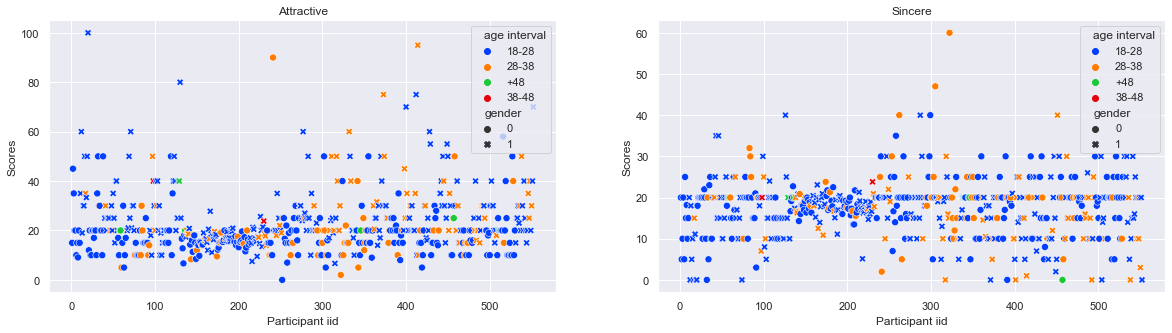

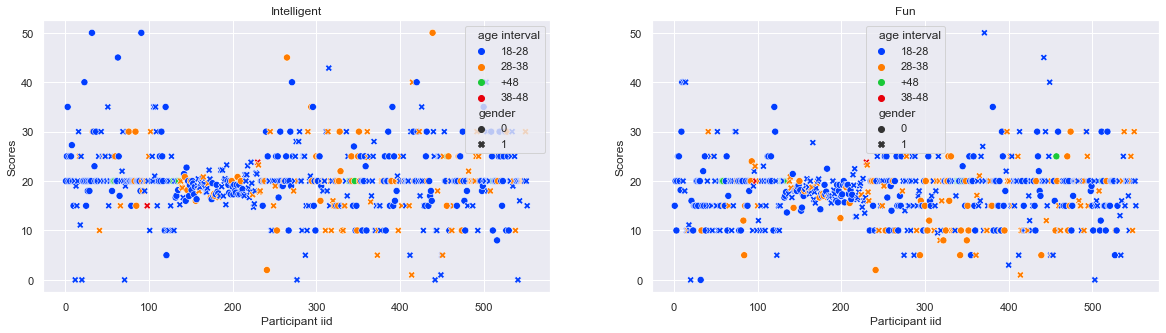

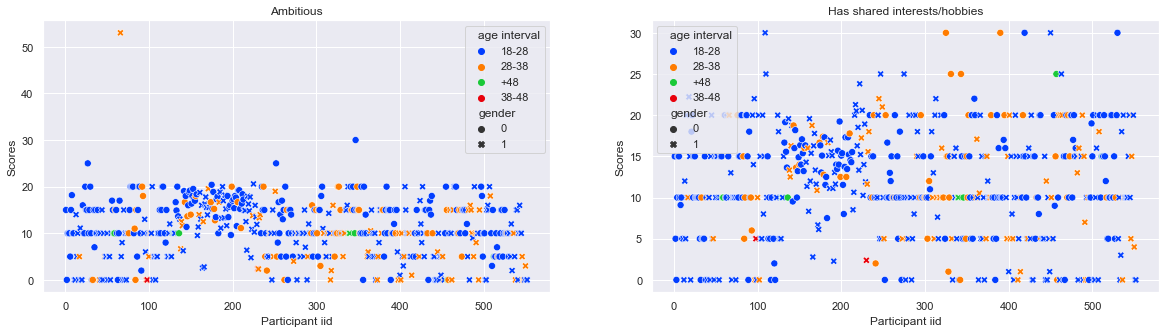

In [66]:
#what you look for in the opposite sex
sns.set(rc={'figure.figsize':(20,5)})
f, axes = plt.subplots(1, 2)
ax = sns.scatterplot(data=test2, x="iid", y="attr1_1",hue='age interval',style='gender',palette='bright',s=50,ax=axes[0])
ax.set(xlabel='Participant iid',
       ylabel='Scores',
       title='Attractive')

ax = sns.scatterplot(data=test2, x="iid", y="sinc1_1",hue='age interval',style='gender',palette='bright',s=50,ax=axes[1])
ax.set(xlabel='Participant iid',
       ylabel='Scores',
      title='Sincere')
plt.show()

f, axes = plt.subplots(1, 2)
ax = sns.scatterplot(data=test2, x="iid", y="intel1_1",hue='age interval',style='gender',palette='bright',s=50,ax=axes[0])
ax.set(xlabel='Participant iid',
       ylabel='Scores',
      title='Intelligent')

ax = sns.scatterplot(data=test2, x="iid", y="fun1_1",hue='age interval',style='gender',palette='bright',s=50,ax=axes[1])
ax.set(xlabel='Participant iid',
       ylabel='Scores',
      title='Fun')
plt.show()

f, axes = plt.subplots(1, 2)
ax = sns.scatterplot(data=test2, x="iid", y="amb1_1",hue='age interval',style='gender',palette='bright',s=50,ax=axes[0])
ax.set(xlabel='Participant iid',
       ylabel='Scores',
      title='Ambitious')

ax = sns.scatterplot(data=test2, x="iid", y="shar1_1",hue='age interval',style='gender',palette='bright',s=50,ax=axes[1])
ax.set(xlabel='Participant iid',
       ylabel='Scores',
      title='Has shared interests/hobbies')
plt.show()

### CONSTRUCTING A MODEL

In [67]:
test2_2 = test2.drop(columns=['age'])
test2_2

,iid,gender,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,age interval
0,1,0,15.0,20.0,20.0,15.0,15.0,15.0,18-28
1,2,0,45.0,5.0,25.0,20.0,0.0,5.0,18-28
2,3,0,35.0,10.0,35.0,10.0,10.0,0.0,18-28
3,4,0,20.0,20.0,20.0,20.0,10.0,10.0,18-28
4,5,0,20.0,5.0,25.0,25.0,10.0,15.0,18-28
...,...,...,...,...,...,...,...,...,...
546,548,1,40.0,10.0,20.0,10.0,0.0,20.0,28-38
547,549,1,20.0,20.0,20.0,20.0,0.0,20.0,18-28
548,550,1,30.0,3.0,30.0,30.0,3.0,4.0,28-38
549,551,1,40.0,20.0,20.0,20.0,0.0,0.0,18-28


I ran this code several times for different numbers of clusters, and 2 is the most ideal! The silhouette score of the kmeans clustering model ended up being %47.. pretty low.

In [68]:
X = test2_2.iloc[:,1:8]
y = test2_2.iloc[:,8]
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X)

score = silhouette_score(X, y_pred)
print("The silhouette score of this model is",score)

The silhouette score of this model is 0.4760798900395666


Making sure by checking the cross tab, the clusters are seperated somewhat okay.

In [69]:
pd.crosstab(y,y_pred)

col_0,0,1
age interval,,
+48,8,1
18-28,358,53
28-38,108,21
38-48,1,1


# DECISION TREE MODELING
### CONSTRUCTING A MODEL
In test 3, I plan to observe how people's views on dating, effect the number of matches they have at the end. The following questions were asked to participants in the sign up survey.

    goal: What is your primary goal in participating in this event? 

    date: In general, how frequently do you go on dates? 

    go out: How often do you go out (not necessarily on dates)?

    expnum: Out of the 20 people you will meet, how many do you expect will be interested in dating you? 


In [125]:
test3 = participant_info[['iid','gender', 'goal', 'date','go_out','expnum']]

In [644]:
participants;

Using groupby function, I am counting and categorizing partipicants' dates as success matches and failed matches. 

Counter data frame represents the matching count for each subject.

In [126]:
match_situation2 = data[['iid','pid','match']]
counter = match_situation2.groupby(['iid','match']).count().unstack(fill_value=0).stack()
counter = counter.rename(columns={"pid": "match count"})
counter

match count
iid match             
1   0                6
    1                4
2   0                8
    1                2
3   0               10
...                ...
550 1                4
551 0               20
    1                2
552 0               16
    1                6

[1102 rows x 1 columns]

In [127]:
(data.loc[(data['iid']==1)&data['match']==1]).shape[0] #gives the same result with what I found above

4

In [128]:
match_yes=[]
match_no=[]
for i,j in counter.index:
    if j==0:
        match_no.append(counter['match count'][i,j])
    elif j==1:
        match_yes.append(counter['match count'][i,j])

In [129]:
test3['success_match']=match_yes
test3['fail_match']=match_no

Now, test 3 data frame includes all participant id's and their success&failed match numbers. However I don't want to use numerical data in decision tree learning, so below, I label people's matching situation based on how many successful matches they have.

- 0 matches in total -> No match

- 0-6 matches in total -> Medium matches

- +6 matches in total -> High matches

In [130]:
test3

,iid,gender,goal,date,go_out,expnum,success_match,fail_match
0,1,0,2.0,7.0,1.0,2.0,4,6
1,2,0,1.0,5.0,1.0,5.0,2,8
2,3,0,6.0,3.0,1.0,2.0,0,10
3,4,0,1.0,5.0,1.0,2.0,2,8
4,5,0,2.0,4.0,1.0,10.0,2,8
...,...,...,...,...,...,...,...,...
546,548,1,1.0,6.0,1.0,2.0,5,17
547,549,1,1.0,7.0,1.0,2.0,5,17
548,550,1,2.0,4.0,1.0,2.0,4,18
549,551,1,1.0,6.0,3.0,2.0,2,20


In [131]:
test3['success_match'].unique()

array([ 4,  2,  0,  8,  7,  3,  1,  9,  5,  6, 11, 10, 14], dtype=int64)

In [132]:
test3['match']=''
for i in range(len(test3)):
    if test3['success_match'][i]==0:
        test3['match'][i]='No match'
    elif (test3['success_match'][i]>0) & (test3['success_match'][i]<=6):
        test3['match'][i]='Medium matches'
    else:
        test3['match'][i]='High matches'
test3

,iid,gender,goal,date,go_out,expnum,success_match,fail_match,match
0,1,0,2.0,7.0,1.0,2.0,4,6,Medium matches
1,2,0,1.0,5.0,1.0,5.0,2,8,Medium matches
2,3,0,6.0,3.0,1.0,2.0,0,10,No match
3,4,0,1.0,5.0,1.0,2.0,2,8,Medium matches
4,5,0,2.0,4.0,1.0,10.0,2,8,Medium matches
...,...,...,...,...,...,...,...,...,...
546,548,1,1.0,6.0,1.0,2.0,5,17,Medium matches
547,549,1,1.0,7.0,1.0,2.0,5,17,Medium matches
548,550,1,2.0,4.0,1.0,2.0,4,18,Medium matches
549,551,1,1.0,6.0,3.0,2.0,2,20,Medium matches


Creating a decision tree learning model with entropy as criterion. Inputs are people's answers to 4 questions regarding their dating/social life, and the output is their number of matches categorized.

I obtain a pretty good score around %76... 

In [144]:
X = test3.iloc[:,1:6]
y = test3.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5)

model = DecisionTreeClassifier(max_depth=3,criterion='entropy')
model.fit(X,y)
model.score(X_test,y_test)

0.7681159420289855

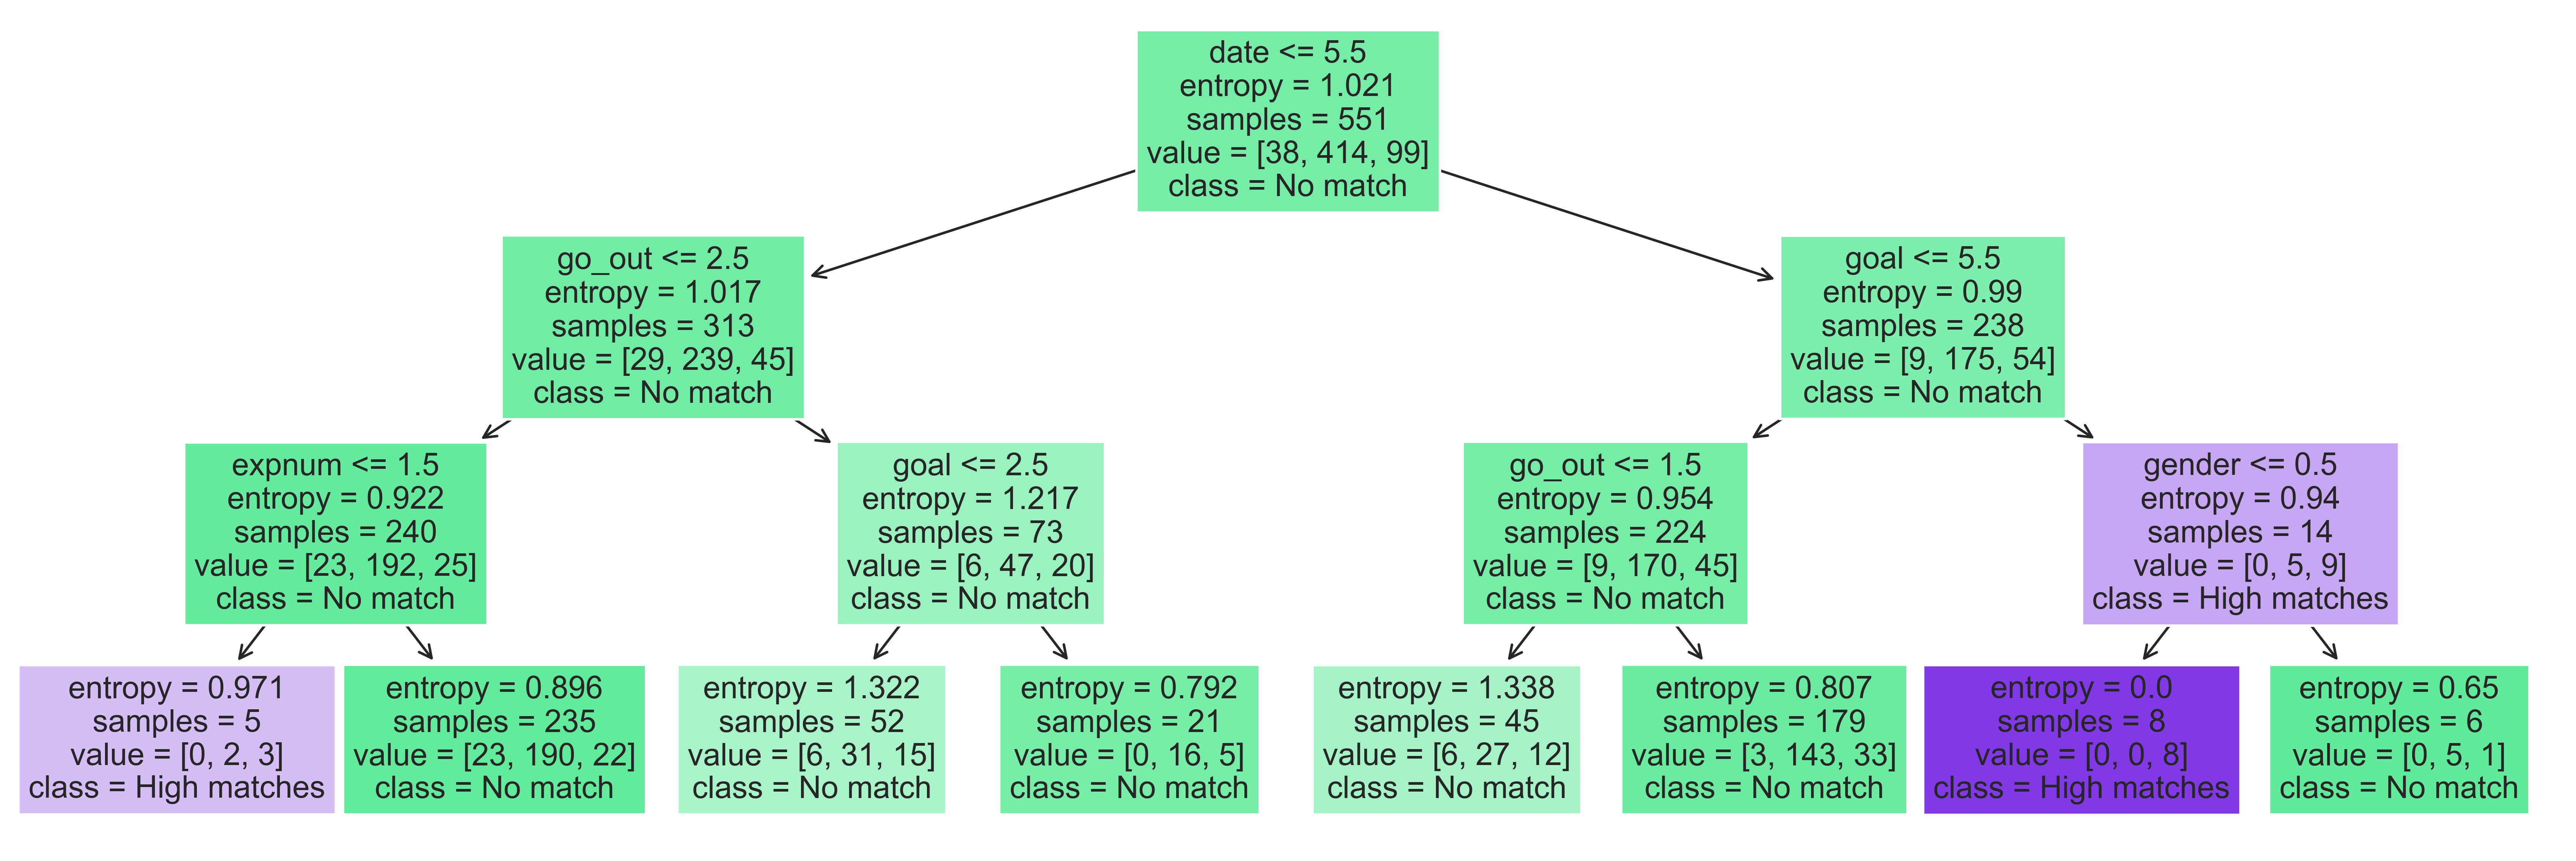

In [146]:
plt.figure(figsize=(18,6),dpi=480)
tree.plot_tree(model,filled=True,feature_names=X.columns,class_names=y.unique());

Interesting to see that it is possible to obtain high number of matches at both ends of the tree.

And also confusing how the decision tree model does not consider medium matches scenario as it had the most entries out of all 3 categories...

But according to the tree plot, high number of matches being on both sides of frequency in dating, shows me that how frequent people go on dates have no effect. And surprisingly on the left side two leaves show that not expecting too many people being interested in you might resolve in high number of matches. This is a conclusion I don't really trust. 

Right side shows that women have higher number of matches (in this experiment).

### VISUALIZATION

I am curious to see how people's goals prior to the event, are in relation to their match count? Do people who are looking for a serious relationship find more or less matches? 

	1= Seemed like a fun night out
	2= To meet new people
	3= To get a date
	4= Looking for a serious relationship
	5= To say I did it
    6= Other

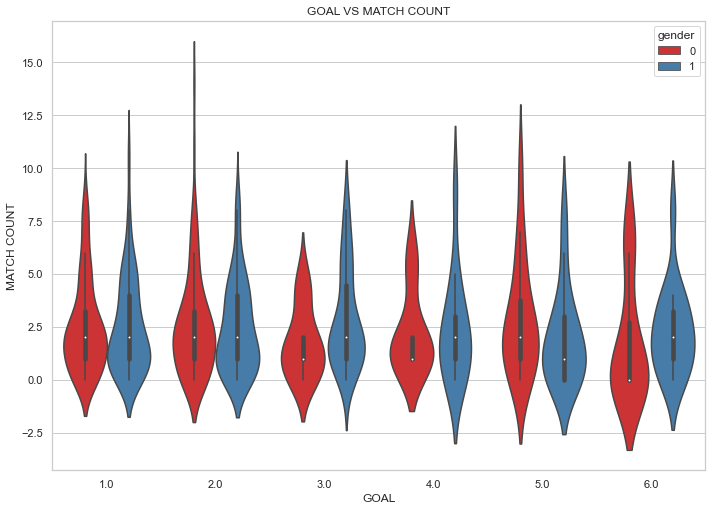

In [148]:
gr = sns.set(style = 'whitegrid',rc={'figure.figsize':(11.7,8.27)})
colors = ['#A52A2A','#7FFF00']
gr = sns.violinplot(x ="goal",
             y ="success_match",
               hue='gender',
               palette="Set1", 
             data = test3,colors=colors)
gr.set(xlabel ="GOAL", ylabel = "MATCH COUNT", title ='GOAL VS MATCH COUNT');

The violin plot shows me that,

- People who are just looking to spend fun time in the event find not that many matches, on average around 0-2.5

- Women who are looking to meet new people on average find 2.5 matches, but the highest number of matches belongs in this category, +15... So having a neutral mindset about this experiment might have effected this result.

- Participants who are specifically looking for a date did not get so much luck.

- Looking for a serious relationship ended up being similar to those who joind only because it seemed like a fun night.

- Participants who joined only to say they did it, got a good number of matches, maybe their casual view on participating this event made it easier to match with people.

# NAIVE BAYES MODELING
### CONSTRUCTING A MODEL
Naive Bayes classification is familiar from the Bayes's theorem and the concept of this algorithm seemed fitting for my dataset. Bayes' theorem explains the probability of something happening related to another thing happening prior. And the Naive assumption comes from the features being independent from each other.

In conclusion, Naive Bayes classification algorithm -which is a supervised learning algorithm, I assume that each of the features have an **independent** and **equal** contribution to the outcome. 

For this section, I re-use the prepared data from the logistic regression model which has parameters of 2 people such as race, age difference and career. I use Gaussian Naive Bayes because I assume the likelihood of the parameters to be Gaussian.

In [181]:
X = a[['same_career','same_race','age difference']].to_numpy()
y = a['match'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [183]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score*100)

83.6281070745698


By scikit learn's own definition, *CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature, which is described by the index , has its own categorical distribution*. This method also seemed appropriate for my data because of the way I prepared it.

However, I obtained the same accuracy score as Gaussian Naive Bayes, which is interesting as I was expecting Categorical Naive Bayes to be a better fit for my data.

In [188]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred = cnb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score*100)

83.6281070745698


# OVERVIEW OF THE PROJECT

I am satisfied with my choice of data, however for more accurate results (especially in Logistic Regression modelling) it could have been better to work with a larger data set. And even though it had some faulty sections (all nulls) that did not bother me as I was not working on those parts. And with the parts I was working on, it was managable to fill out empty values as the median of others.

With the conclusions I obtained it would not be right to generalize what the model predicts. Some of the outcomes might be special to this experiment only, as in the analyzing statements some of the conclusions I reached felt unreliable to me! 

However I strongly believe what I stated earlier in the project (in test1) that 2 people matching might not have a stable formula that we just can teach machines. There are a lot factors behind it other than just being the same age, having similar careers, race etc... The psychology aspect and hormonal aspect were definitely not included in this data. Sometimes 2 people dating never even makes sense but that is built in being human.

But scratching the idea of this project completely by saying love and relationships are complicated and machines can't learn it, is not a smart thing to do. As I stated, having a larger dataset with more parameters such as the psychological situation of a person might give amazing results. And it is definitely possible for machine learning algorithms to observe and learn this types of situations.

I still could do interesting observations with different tests. Creating different scenarios and picking different parts of the whole data for each modelling process definitely helped. Instead of re-using the same data for all the models I switched things up which helped me learn more.

It was a very fun project that had amazing analyzing processes and made me learn/research all the machine learning algorithms I've used, a little better!